In [1]:
import pandas as pd
import torch
import os
BASE_DIR = r"C:\Users\husseien\Desktop\340915149_322754953\Source Code"
DATA_DIR = os.path.join(BASE_DIR, "data")
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
files_directory = os.path.join(DATA_DIR, "unlabeled", "unlabeled")

In [2]:
# get data and probabilities
data = pd.read_csv(TRAIN_CSV)
activities_probabilities = (data['activity'].value_counts() / len(data)).to_dict()

In [3]:
DATA_DIR = r"C:\Users\husseien\Desktop\340915149_322754953\Source Code\data"
sample_submission_path = os.path.join(DATA_DIR, "sample_submission.csv")
# get and save results for test data
labels = ['brushing_teeth', 'idle', 'preparing_sandwich', 'reading_book', 'stairs_down', 'stairs_up', 'typing',
          'using_phone', 'using_remote_control', 'walking_freely', 'walking_holding_a_tray',
          'walking_with_handbag', 'walking_with_hands_in_pockets', 'walking_with_object_underarm',
          'washing_face_and_hands', 'washing_mug', 'washing_plate', 'writing']
results = pd.DataFrame(columns=['sample_id'] + labels)
for file_id in pd.read_csv(sample_submission_path)['sample_id'].to_list():

    result_dict = {'sample_id': [file_id]}
    for label in labels:
        result_dict[label] = [activities_probabilities[label]]
    new_row = pd.DataFrame(result_dict)
    results = pd.concat([results, new_row], ignore_index=True)
results.to_csv('results_simple_prob.csv', index=False)

C:\Users\husseien\AppData\Local\Temp\ipykernel_8740\2656483446.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


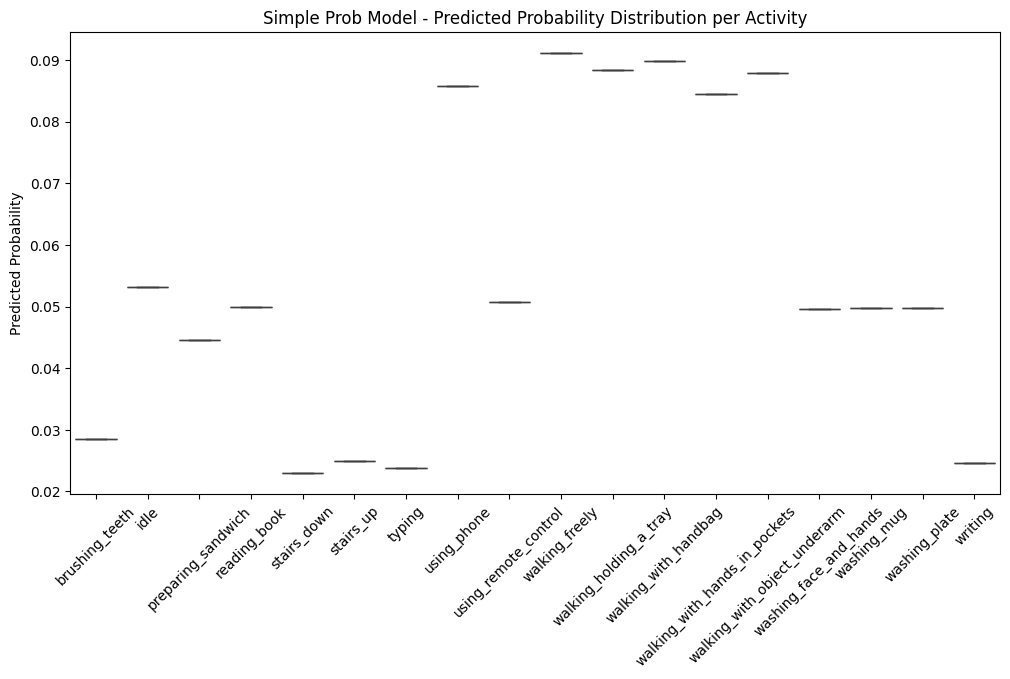

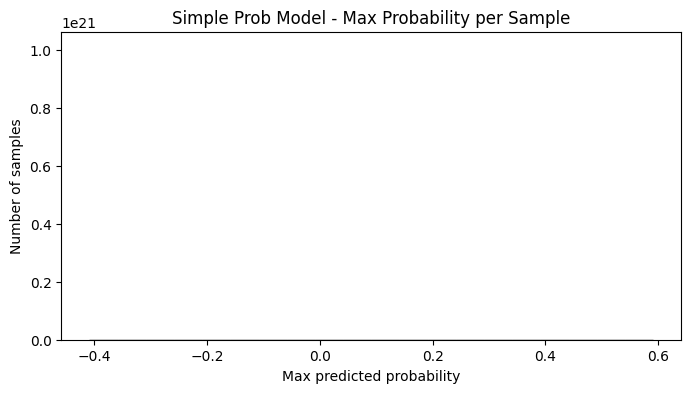

C:\Users\husseien\AppData\Local\Temp\ipykernel_8740\620806403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Blues')


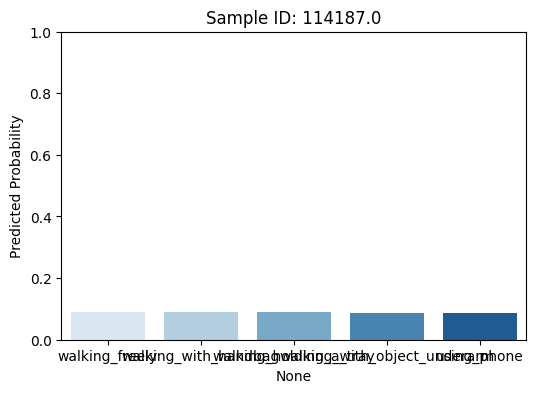

C:\Users\husseien\AppData\Local\Temp\ipykernel_8740\620806403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Blues')


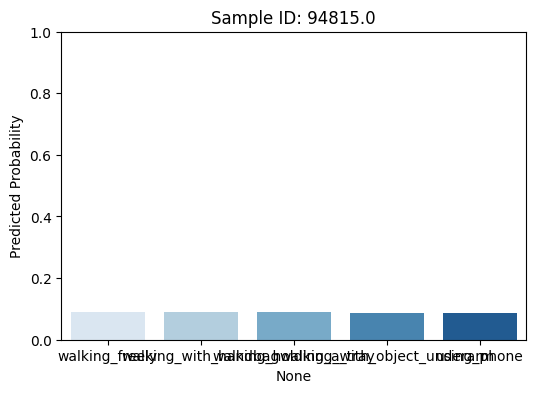

C:\Users\husseien\AppData\Local\Temp\ipykernel_8740\620806403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Blues')


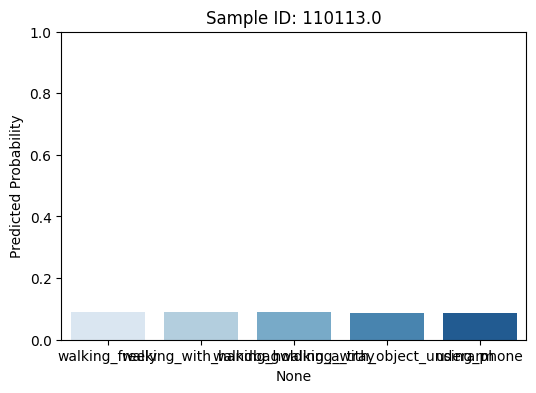

C:\Users\husseien\AppData\Local\Temp\ipykernel_8740\620806403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Blues')


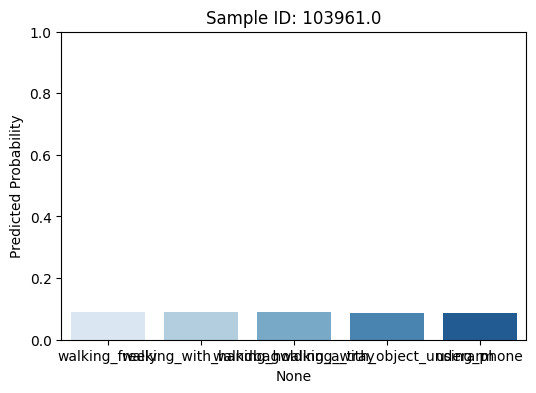

C:\Users\husseien\AppData\Local\Temp\ipykernel_8740\620806403.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_classes.index, y=top_classes.values, palette='Blues')


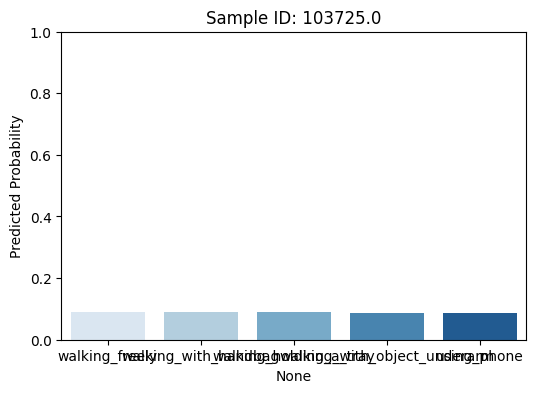

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results
results = pd.read_csv('results_simple_prob.csv')

# Columns with activities
activity_cols = [c for c in results.columns if c != 'sample_id']

# 1. Plot distribution of predicted probabilities for each activity
plt.figure(figsize=(12,6))
sns.boxplot(data=results[activity_cols])
plt.xticks(rotation=45)
plt.title("Simple Prob Model - Predicted Probability Distribution per Activity")
plt.ylabel("Predicted Probability")
plt.show()

# 2. Histogram of max probability per sample (model confidence)
max_probs = results[activity_cols].max(axis=1)
plt.figure(figsize=(8,4))
sns.histplot(max_probs, bins=20, kde=True, color='blue')
plt.title("Simple Prob Model - Max Probability per Sample")
plt.xlabel("Max predicted probability")
plt.ylabel("Number of samples")
plt.show()

# 3. Optional: Top 5 predicted classes per random sample
sample = results.sample(5)
for _, row in sample.iterrows():
    top_classes = row[activity_cols].sort_values(ascending=False)[:5]
    plt.figure(figsize=(6,4))
    sns.barplot(x=top_classes.index, y=top_classes.values, palette='Blues')
    plt.title(f"Sample ID: {row['sample_id']}")
    plt.ylabel("Predicted Probability")
    plt.ylim(0,1)
    plt.show()
